<a href="https://colab.research.google.com/github/Prerna99-star/Face_Recognizer/blob/master/Face_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 30kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=c5ac3b06813ca247ad14c30c759e82a01b9bd36320dc9026e5c554910712d9ce
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import PIL.Image
import PIL.ImageDraw
import face_recognition

In [0]:
image1 = face_recognition.load_image_file("person_1.jpg")
image2 = face_recognition.load_image_file("person_2.jpg")
image3 = face_recognition.load_image_file("person_3.jpg")

In [0]:
image1_face_encoding = face_recognition.face_encodings(image1)[0]
image2_face_encoding = face_recognition.face_encodings(image2)[0]
image3_face_encoding = face_recognition.face_encodings(image3)[0]

In [0]:
known_face_encodings = [
image1_face_encoding,
image2_face_encoding,
image3_face_encoding
]


In [0]:
unknown_image = face_recognition.load_image_file("unknown_2.jpg")
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations= face_locations)

Found Person 3 in the photo!
Found Person 2 in the photo!
Found Person 1 in the photo!
A face is located at pixel location Top: 91, Left: 615, Bottom: 169, Right: 693
A face is located at pixel location Top: 141, Left: 770, Bottom: 234, Right: 863
A face is located at pixel location Top: 140, Left: 462, Bottom: 205, Right: 527


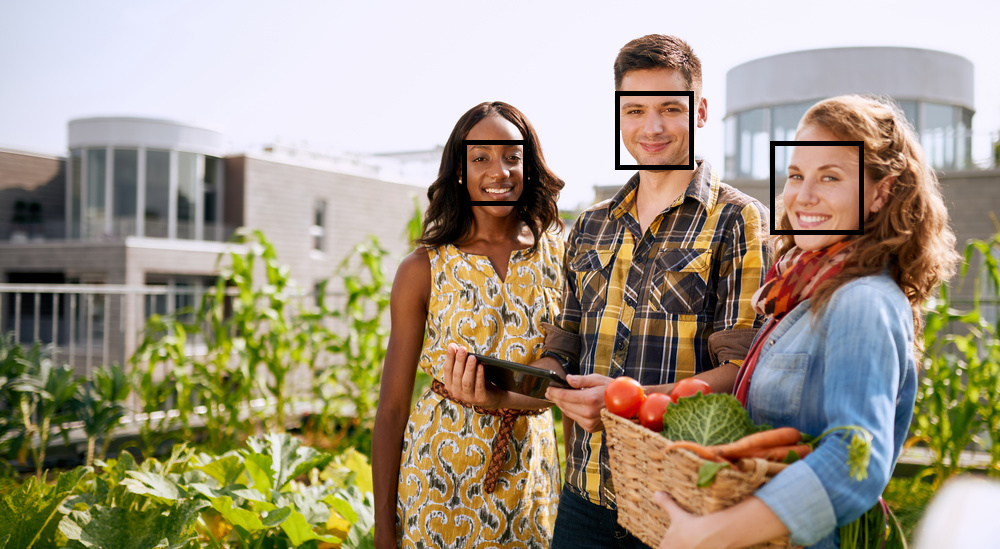

In [8]:
for unknown_face_encoding in unknown_face_encodings:
    
    results = face_recognition.compare_faces(known_face_encodings,unknown_face_encoding)

    name = "Unknown"

    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"

    print(f"Found {name} in the photo!")


pil_image = PIL.Image.fromarray(unknown_image)
for face_location in face_locations:
 top, right, bottom, left = face_location
 print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

 draw = PIL.ImageDraw.Draw(pil_image)
 draw.rectangle([left, top, right, bottom], outline="black", width = 5 )

from IPython.display import display 
display(pil_image)